# Proyecto final:



Objetivo: **Supervivencia en cáncer de pulmón.**

## Imports

In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

# Definir las rutas
path_interim = "../data/interim/"
path_processed = "../data/processed/"

## Comprensión de los Datos

In [100]:
pd.set_option('display.max_columns', None)

In [101]:
df = pd.read_csv('../data/raw/clinical_data.zip')
df

,Age recode with <1 year olds and 90+,Race and origin (recommended by SEER),"Race recode (White, Black, Other)",Primary Site - labeled,Histologic Type ICD-O-3,Grade Clinical (2018+),Diagnostic Confirmation,Combined Summary Stage with Expanded Regional Codes (2004+),"Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Tumor Size Summary (2016+),AJCC ID (2018+),CS tumor size (2004-2015),Survival months,Vital status recode (study cutoff used),SEER cause-specific death classification,Year of diagnosis,Median household income inflation adj to 2023,RX Summ--Surg Prim Site (1998+),Reason no cancer-directed surgery,Rural-Urban Continuum Code,Type of Reporting Source,PRCDA 2020,Total number of in situ/malignant tumors for patient,CS extension (2004-2015),Derived EOD 2018 Stage Group Recode (2018+),Sequence number,"Origin recode NHIA (Hispanic, Non-Hisp)"
0,65-69 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8140,2,Positive histology,Regional by both direct extension and lymph no...,Blank(s),Blank(s),Blank(s),070,Lung,Blank(s),0059,Alive,Alive or dead of other cause,2018,"$120,000+",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,Blank(s),3A,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino
1,65-69 years,All races/ethnicities,White,C34.0-Main bronchus,8140,Blank(s),"Positive exfoliative cytology, no positive his...",Distant site(s)/node(s) involved,Blank(s),Blank(s),Blank(s),109,Blank(s),Blank(s),0027,Dead,Dead (attributable to this cancer dx),2016,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,Blank(s),Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino
2,65-69 years,All races/ethnicities,Black,"C34.9-Lung, NOS",8041,Blank(s),Positive histology,Unknown/unstaged/unspecified/DCO,TX,NX,M0,Blank(s),Blank(s),999,0000,Dead,Dead (attributable to this cancer dx),2014,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Physicians office/private medical practitioner...,Not PRCDA,2,999,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino
3,80-84 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8550,Blank(s),Positive histology,Regional by direct extension only,T3,N0,M0,Blank(s),Blank(s),028,0052,Dead,Dead (attributable to this cancer dx),2015,"$100,000 - $109,999",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,100,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino
4,65-69 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8140,3,Positive histology,Localized only,Blank(s),Blank(s),Blank(s),033,Lung,Blank(s),0012,Dead,Alive or dead of other cause,2020,"$120,000+",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,3,Blank(s),1B,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537413,70-74 years,All races/ethnicities,Black,"C34.9-Lung, NOS",8000,9,Unknown,Unknown/unstaged/unspecified/DCO,Blank(s),Blank(s),Blank(s),999,Lung,Blank(s),0000,Dead,Dead (attributable to this cancer dx),2022,"$70,000 - $74,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Nursing/convalescent home/hospice,Not PRCDA,1,Blank(s),99,One primary only,Non-Spanish-Hispanic-Latino
537414,90+ years,All races/ethnicities,White,"C34.9-Lung, NOS",8000,9,Radiography without microscopic confirm,Distant site(s)/node(s) involved,Blank(s),Blank(s),Blank(s),999,Lung,Blank(s),0016,Dead,Dead (attributable to this cancer dx),2021,"$70,000 - $74,999",0,Not recommended,"Counties in metropolitan areas of 250,000 to 1...",Hospital inpatient/outpatient or clinic,Not PRCDA,1,Blank(s),4A,One prima

In [102]:
df.shape

(537418, 29)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537418 entries, 0 to 537417
Data columns (total 29 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Age recode with <1 year olds and 90+                         537418 non-null  object
 1   Race and origin (recommended by SEER)                        537418 non-null  object
 2   Race recode (White, Black, Other)                            537418 non-null  object
 3   Primary Site - labeled                                       537418 non-null  object
 4   Histologic Type ICD-O-3                                      537418 non-null  int64 
 5   Grade Clinical (2018+)                                       537418 non-null  object
 6   Diagnostic Confirmation                                      537418 non-null  object
 7   Combined Summary Stage with Expanded Regional Codes (2004+)  537418 non-nu

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Histologic Type ICD-O-3,537418.0,8122.758679,126.531359,8000.0,8041.0,8072.0,8140.0,9581.0
Year of diagnosis,537418.0,2016.977267,3.142155,2012.0,2014.0,2017.0,2020.0,2022.0
RX Summ--Surg Prim Site (1998+),537418.0,9.517683,20.696553,0.0,0.0,0.0,0.0,99.0
Total number of in situ/malignant tumors for patient,537418.0,1.422438,0.751866,1.0,1.0,1.0,2.0,34.0


In [105]:
df.columns

Index(['Age recode with <1 year olds and 90+',
       'Race and origin (recommended by SEER)',
       'Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Diagnostic Confirmation',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'Type of Reporting Source', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)'

## EDA

### Duplicados y nulos

In [106]:
df.isnull().sum()

Age recode with <1 year olds and 90+                             0
Race and origin (recommended by SEER)                            0
Race recode (White, Black, Other)                                0
Primary Site - labeled                                           0
Histologic Type ICD-O-3                                          0
Grade Clinical (2018+)                                           0
Diagnostic Confirmation                                          0
Combined Summary Stage with Expanded Regional Codes (2004+)      0
Derived AJCC T, 7th ed (2010-2015)                             431
Derived AJCC N, 7th ed (2010-2015)                             431
Derived AJCC M, 7th ed (2010-2015)                             431
Tumor Size Summary (2016+)                                       0
AJCC ID (2018+)                                                  0
CS tumor size (2004-2015)                                        0
Survival months                                               

### Analisis de nuestras variables, para encontrar valores nulos, faltantes y duplicados

Definimos los términos que SEER suele usar para datos faltantes:

In [107]:
terminos_nulos = ['Unknown', 'Unknown/no information', 'Blank', 'N/A', 'Not applicable']

In [108]:
resumen_nulos = []
for col in df.columns:
    # 1. Contar NaN técnicos
    nulos_reales = df[col].isnull().sum()

    # 2. Contar "Unknown" (solo en columnas tipo objeto o convirtiendo a string)
    # Buscamos también códigos numéricos comunes en SEER como 999 o 888 si es necesario
    nulos_disfrazados = df[df[col].astype(str).str.contains('|'.join(terminos_nulos), case=False, na=False)].shape[0]

    total = nulos_reales + nulos_disfrazados
    porcentaje = (total / len(df)) * 100

    resumen_nulos.append({
        'Columna': col,
        'NaN': nulos_reales,
        'Unknown/Disfrazados': nulos_disfrazados,
        'Total Faltantes': total,
        '% Faltante': round(porcentaje, 2)
    })

In [109]:
df_calidad = pd.DataFrame(resumen_nulos).sort_values(by='% Faltante', ascending=False)

In [110]:
df_calidad[df_calidad['Total Faltantes'] > 0]

,Columna,NaN,Unknown/Disfrazados,Total Faltantes,% Faltante
8,"Derived AJCC T, 7th ed (2010-2015)",431,341816,342247,63.68
9,"Derived AJCC N, 7th ed (2010-2015)",431,341816,342247,63.68
10,"Derived AJCC M, 7th ed (2010-2015)",431,341816,342247,63.68
25,CS extension (2004-2015),0,341816,341816,63.60
13,CS tumor size (2004-2015),0,341816,341816,63.60
5,Grade Clinical (2018+),0,295333,295333,54.95
26,Derived EOD 2018 Stage Group Recode (2018+),0,295333,295333,54.95
12,AJCC ID (2018+),0,295333,295333,54.95
11,Tumor Size Summary (2016+),0,195602,195602,36.40
2,"Race recode (White, Black, Other)",0,45451,45451,8.46


#### Observaciones:

**Datos excluyentes:**
> Las columnas con más del 60% de faltantes (AJCC 7th ed) y las que tienen un 54% (2018+) suman casi el 100%.
>
> Explicación: Esto confirma que nuestro dataset abarca muchos años. Los pacientes que tienen datos en la "7th ed" (2010-2015) no los tienen en la de "2018+", y viceversa.
>
> No podemos borrar estas filas. Si borramos los "Unknown" de la 7ma edición, estaríamos borrando a todos los pacientes diagnosticados después de 2018.
>

**Columnas Críticas (Análisis de Riesgo)**
Hay tres variables donde los faltantes son especialmente relevantes:
> 1. Race recode (8.46%): Es un porcentaje alto para una variable demográfica básica.
>
> 2. Survival months (2.43%): Son 13,051 pacientes sin tiempo de supervivencia.
>
> 3. Diagnostic Confirmation (3.78%): Es importante saber si el cáncer se confirmó por biopsia o solo por observación clínica.
>

**Datos casi Perfectos:**
Las columnas al final de la tabla están impecables:
>
> Rural-Urban, Income, PRCDA: Tienen menos del 0.2% de faltantes.
>

**Toma de decision:**

Limpieza de Supervivencia: Eliminaremos los registros donde no sabemos cuánto tiempo vivió el paciente.

Limpieza Geográfica: Eliminaremos los pocos nulos de ingresos y zona rural/urbana.

Preservación Clínica: No eliminaremos los "Unknown" de las etapas (T, N, M, Grade), sino los trataremos como una categoría estadística legítima.

Confirmación de diagnóstico (3.78%): Los trataremos más adelante cuando analicemos la variable más a fondo.
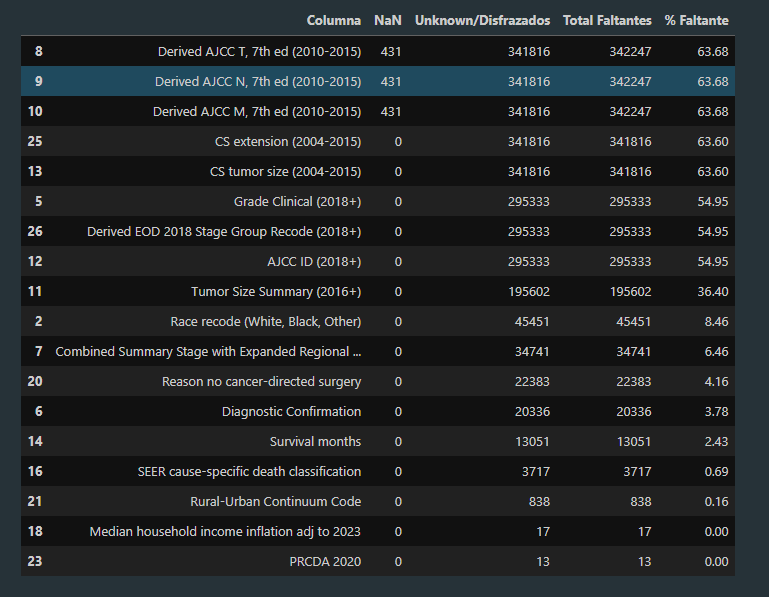

In [111]:
# 1. Filtramos y creamos una copia explícita para evitar warnings
df_clean = df[~df['Survival months'].astype(str).str.contains('Unknown', case=False)].copy()

# 2. Eliminamos nulos en variables socioeconómicas (inplace=True ya no es necesario)
df_clean = df_clean.dropna(subset=['Rural-Urban Continuum Code', 'Median household income inflation adj to 2023'])

# 3. Convertimos a numérico usando .loc
df_clean.loc[:, 'Survival months'] = pd.to_numeric(df_clean['Survival months'], errors='coerce')

# 4. Eliminamos cualquier NaN que haya quedado tras la conversión numérica
df_clean = df_clean.dropna(subset=['Survival months'])

print(f"Limpieza completada. Registros restantes: {len(df_clean)}")

Limpieza completada. Registros restantes: 524367


In [112]:
df_clean.to_csv(os.path.join(path_interim, 'df_cancer_cleaned_eda.csv'), index=False)

### Agrupamiento (Binning), Consolidación y Limpieza de NAs

Procederemos a simplificar algunas categorias :

Simplificar la Edad: La columna Age recode suele venir en rangos de 5 años (00-04, 05-09, etc.). Crearemos una columna de "Etapa de Vida" (Niñez, Joven, Adulto, Adulto Mayor).

Agrupar Etapas de Cáncer: Como vimos, las columnas de AJCC tienen muchos "Unknown". Crearemos una columna única de "Etapa Simplificada" que combine la información disponible para no perder los datos de 2018+.

Binning de Ingresos: Convertiremos el ingreso exacto en "Cuartiles" (Bajo, Medio-Bajo, Medio-Alto, Alto). Es mucho más fácil ver tendencias de supervivencia así que viendo montos individuales.

In [113]:
def categorizar_edad(etiqueta):
    etiqueta = str(etiqueta).lower()
    if '00' in etiqueta or '14' in etiqueta or 'teen' in etiqueta:
        return '0-19 (Pediatrico/Joven)'
    elif any(x in etiqueta for x in ['20', '30', '40']):
        return '20-49 (Adulto Joven)'
    else:
        return '70+ (Adulto Mayor)'
df_clean.loc[:, 'Age_Group'] = df_clean['Age recode with <1 year olds and 90+'].apply(categorizar_edad)


In [114]:
def consolidar_etapa_seguro(row):
    e_2018 = str(row.get('Derived EOD 2018 Stage Group Recode (2018+)', ''))
    e_sum = str(row.get('Combined Summary Stage with Expanded Regional Codes (2004+)', ''))

    if 'Stage' in e_2018 and 'Unknown' not in e_2018:
        return e_2018
    elif 'Localized' in e_sum:
        return 'Localized'
    elif 'Regional' in e_sum:
        return 'Regional'
    elif 'Distant' in e_sum:
        return 'Distant'
    return 'Unknown/Other'

df_clean['Stage_Consolidated'] = df_clean.apply(consolidar_etapa_seguro, axis=1)

In [115]:
orden_ingresos = sorted(df_clean['Median household income inflation adj to 2023'].unique())
df_clean.loc[:, 'Income_Level'] = pd.Categorical(df_clean['Median household income inflation adj to 2023'],
                                                 categories=orden_ingresos,
                                                 ordered=True)

In [116]:
df_clean

,Age recode with <1 year olds and 90+,Race and origin (recommended by SEER),"Race recode (White, Black, Other)",Primary Site - labeled,Histologic Type ICD-O-3,Grade Clinical (2018+),Diagnostic Confirmation,Combined Summary Stage with Expanded Regional Codes (2004+),"Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Tumor Size Summary (2016+),AJCC ID (2018+),CS tumor size (2004-2015),Survival months,Vital status recode (study cutoff used),SEER cause-specific death classification,Year of diagnosis,Median household income inflation adj to 2023,RX Summ--Surg Prim Site (1998+),Reason no cancer-directed surgery,Rural-Urban Continuum Code,Type of Reporting Source,PRCDA 2020,Total number of in situ/malignant tumors for patient,CS extension (2004-2015),Derived EOD 2018 Stage Group Recode (2018+),Sequence number,"Origin recode NHIA (Hispanic, Non-Hisp)",Age_Group,Stage_Consolidated,Income_Level
0,65-69 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8140,2,Positive histology,Regional by both direct extension and lymph no...,Blank(s),Blank(s),Blank(s),070,Lung,Blank(s),59,Alive,Alive or dead of other cause,2018,"$120,000+",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,Blank(s),3A,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Regional,"$120,000+"
1,65-69 years,All races/ethnicities,White,C34.0-Main bronchus,8140,Blank(s),"Positive exfoliative cytology, no positive his...",Distant site(s)/node(s) involved,Blank(s),Blank(s),Blank(s),109,Blank(s),Blank(s),27,Dead,Dead (attributable to this cancer dx),2016,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,Blank(s),Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Distant,"$110,000 - $119,999"
2,65-69 years,All races/ethnicities,Black,"C34.9-Lung, NOS",8041,Blank(s),Positive histology,Unknown/unstaged/unspecified/DCO,TX,NX,M0,Blank(s),Blank(s),999,0,Dead,Dead (attributable to this cancer dx),2014,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Physicians office/private medical practitioner...,Not PRCDA,2,999,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Unknown/Other,"$110,000 - $119,999"
3,80-84 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8550,Blank(s),Positive histology,Regional by direct extension only,T3,N0,M0,Blank(s),Blank(s),028,52,Dead,Dead (attributable to this cancer dx),2015,"$100,000 - $109,999",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,2,100,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Regional,"$100,000 - $109,999"
4,65-69 years,All races/ethnicities,White,"C34.1-Upper lobe, lung",8140,3,Positive histology,Localized only,Blank(s),Blank(s),Blank(s),033,Lung,Blank(s),12,Dead,Alive or dead of other cause,2020,"$120,000+",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Hospital inpatient/outpatient or clinic,Not PRCDA,3,Blank(s),1B,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Localized,"$120,000+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537413,70-74 years,All races/ethnicities,Black,"C34.9-Lung, NOS",8000,9,Unknown,Unknown/unstaged/unspecified/DCO,Blank(s),Blank(s),Blank(s),999,Lung,Blank(s),0,Dead,Dead (attributable to this cancer dx),2022,"$70,000 - $74,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Nursing/convalescent home/hospice,Not PRCDA,1,Blank(s),99,One primary only,Non-Spanish-Hispanic-Latino,70+ (Adulto Mayor),Unknown/Other,"$70,000 - $74,999"
537414,90+ years,All races/ethnicities,White,"C34.9-Lung, NOS",8000,9,Radiog

### Panorama General (Análisis Univariante)

#### Histograma de supervivencia

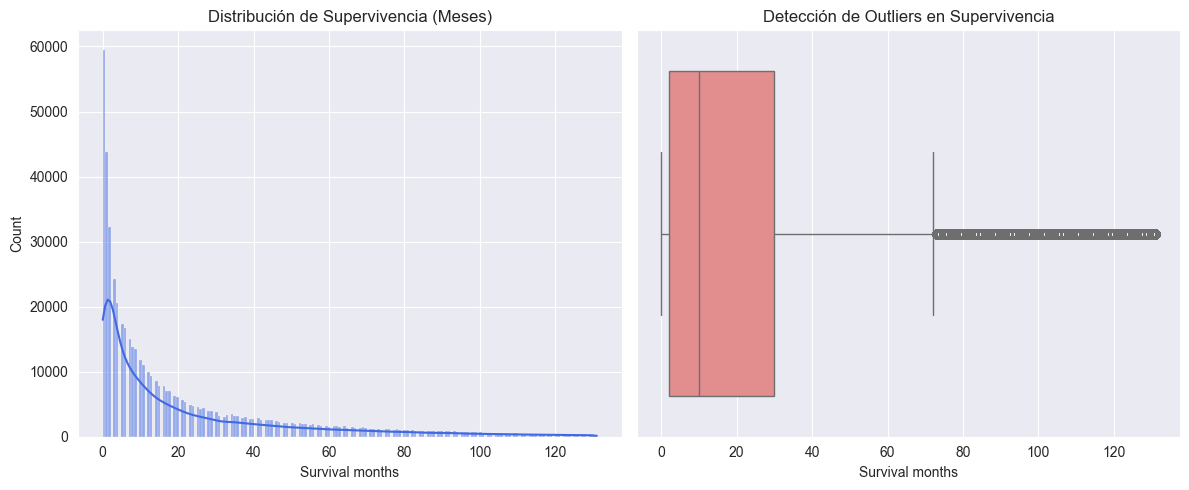

In [117]:
plt.figure(figsize=(12, 5))

# Histograma de supervivencia
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Survival months'], kde=True, color='royalblue')
plt.title('Distribución de Supervivencia (Meses)')

# Boxplot para ver valores atípicos (outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Survival months'], color='lightcoral')
plt.title('Detección de Outliers en Supervivencia')

plt.tight_layout()
plt.show()

#### Observaciones:


1. **Histograma de Supervivencia**

- Mortalidad Temprana: Se observa un pico masivo cerca del mes 0. Esto sugiere que una gran proporción de los pacientes en el dataset fallecen o salen del estudio poco después del diagnóstico.

- Cola Larga (Right-Skewed): La distribución tiene una "cola" que llega hasta los 130 meses. Estos son los "sobrevivientes a largo plazo".

- Implicación Estadística: Debido a este sesgo, la media se verá arrastrada por los sobrevivientes de largo plazo. Debemos usar la mediana como la medida principal de tendencia central en todo el EDA.

2. **Boxplot (Detección de Outliers)**

- Rango Intercuartílico (IQR): La caja marrón muestra que el 50% central de los pacientes sobrevive aproximadamente entre 2 y 30 meses.

- Outliers: Todos los puntos grises a la derecha (después del mes 70 aproximadamente) son considerados valores atípicos estadísticos. Sin embargo, en medicina, estos casos son vitales porque representan el éxito del tratamiento o tipos de cáncer menos agresivos.

#### Análisis por Tipo de Cáncer (Top 10)

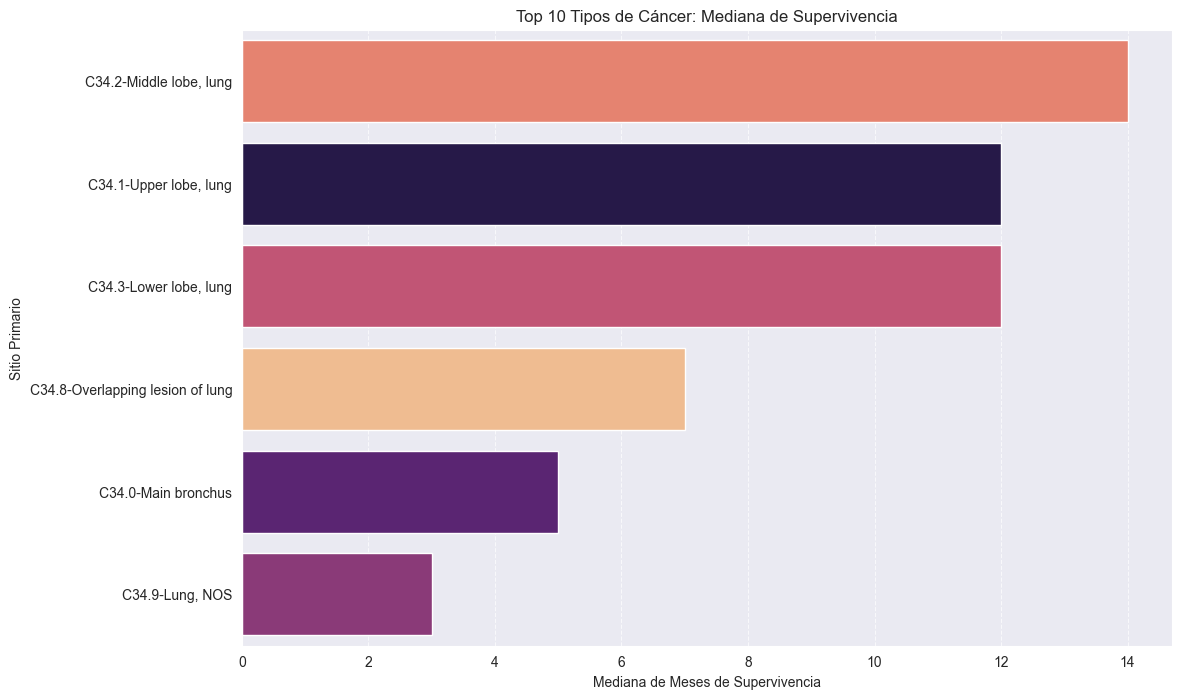

In [118]:
# 1. Identificar los 10 sitios primarios más frecuentes
top_10_sites = df_clean['Primary Site - labeled'].value_counts().nlargest(10).index
df_top10 = df_clean[df_clean['Primary Site - labeled'].isin(top_10_sites)]

# 2. Calcular la mediana de supervivencia por sitio para ordenar el gráfico
order = df_top10.groupby('Primary Site - labeled')['Survival months'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

# 3. Gráfico de barras horizontal para mejor lectura de etiquetas
sns.barplot(
    data=df_top10,
    y='Primary Site - labeled',
    x='Survival months',
    hue='Primary Site - labeled',
    estimator='median',
    order=order,
    palette='magma',
    legend=False
)

plt.title('Top 10 Tipos de Cáncer: Mediana de Supervivencia')
plt.xlabel('Mediana de Meses de Supervivencia')
plt.ylabel('Sitio Primario')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

#### Observaciones:

El gráfico muestra un contraste marcado en la supervivencia dentro de los diferentes sitios del pulmón:

- Mayor supervivencia: Los tumores localizados en el Middle lobe (Lóbulo medio) presentan la mediana más alta, alcanzando los 14 meses.

- Supervivencia intermedia: El lóbulo superior e inferior (Upper/Lower lobe) se mantienen en los 12 meses.

- Peor pronóstico: La categoría C34.9-Lung, NOS (Not Otherwise Specified) tiene la supervivencia más baja, apenas 3 meses. Esto suele ocurrir porque los diagnósticos "no especificados" a menudo corresponden a casos muy avanzados donde no se pudo determinar el origen exacto.


### Factor Clínico: Etapa del Cáncer

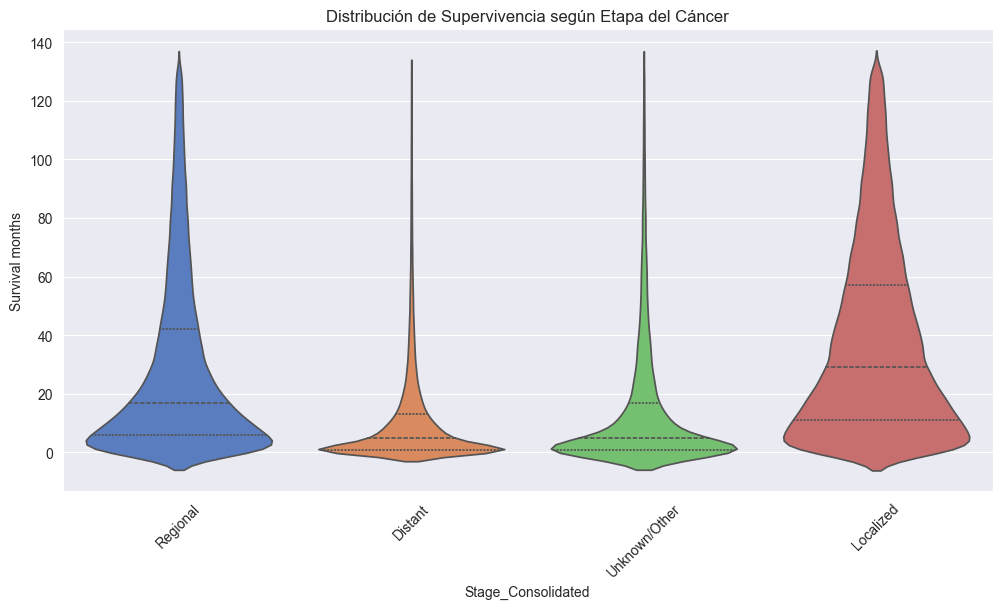

In [119]:
try:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df_clean, x='Stage_Consolidated', y='Survival months', inner="quart", palette="muted", hue='Stage_Consolidated', legend=False)
    plt.xticks(rotation=45)
    plt.title('Distribución de Supervivencia según Etapa del Cáncer')
    plt.show()
except Exception as e:
    print(f"Error al graficar: {e}")

#### Observaciones:

**El Impacto de la Etapa (Violin Plot)**

El gráfico de violín es sumamente claro:

- Distant (Metástasis): Tiene la base más ancha y "aplastada" cerca del cero. Esto confirma una supervivencia muy corta para casos avanzados.

- Unknown/Other: Al igual que el grupo Distant, este violín tiene una base muy ancha y pesada cerca del mes 0. Esto sugiere que muchos de los pacientes cuya etapa no se pudo determinar tienen, lamentablemente, una supervivencia muy corta.

- Localized (Localizado): Es el violín más alto y estilizado, lo que indica que una proporción significativa de pacientes logra sobrevivir mucho más tiempo (llegando a la parte superior de la gráfica).

- Regional: Se sitúa justo en el medio, como una etapa de transición lógica.



### El Impacto Socioeconómico (Análisis Bivariante)

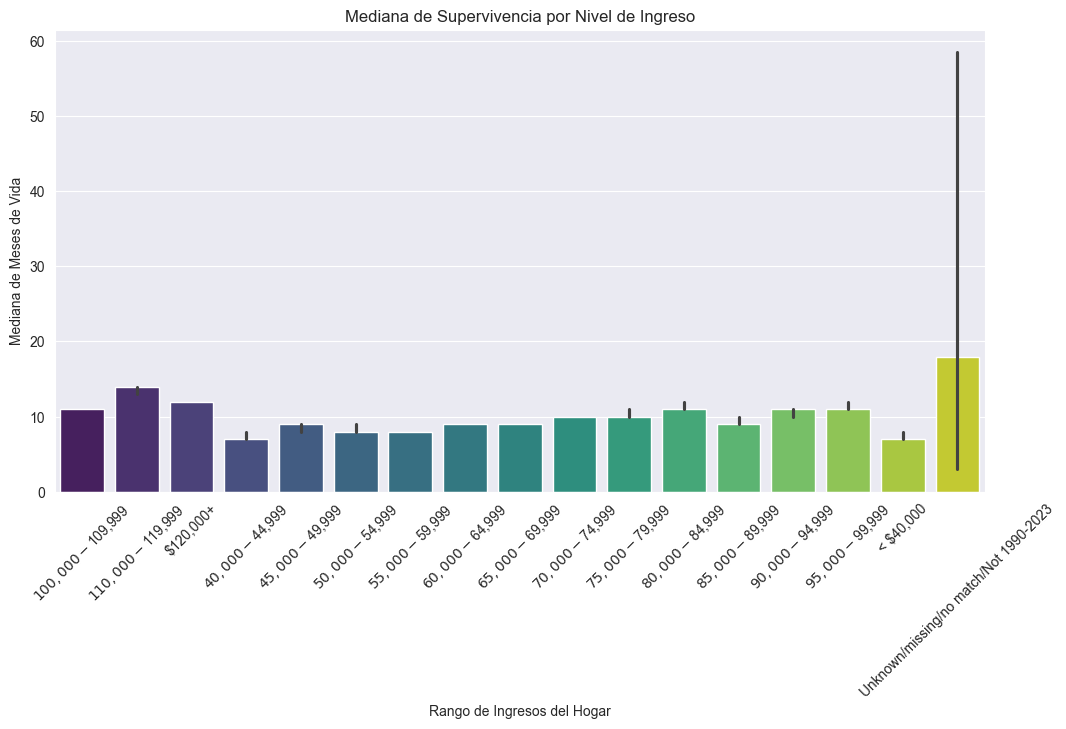

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean, x='Income_Level', y='Survival months', palette='viridis', estimator='median', hue='Income_Level', legend=False)
plt.xticks(rotation=45)
plt.title('Mediana de Supervivencia por Nivel de Ingreso')
plt.ylabel('Mediana de Meses de Vida')
plt.xlabel('Rango de Ingresos del Hogar')
plt.show()

#### Observaciones:

**Relación Ingresos vs. Supervivencia (La "Meseta")**

- Si observamos los rangos de ingresos desde 40,000 hasta 99,999, la mediana de supervivencia se mantiene bastante plana, oscilando entre los 8 y 11 meses.
Esto sugiere que, en esos rangos intermedios, el nivel de ingreso por sí solo no garantiza una ventaja drástica en la supervivencia de estos pacientes.

- Hallazgo Crítico: Hay un ligero incremento en los grupos de 100,000 a 119,999 (llegando a los 14 meses). Esto podría indicar que solo a partir de cierto umbral de riqueza muy alto se empieza a observar un acceso a tratamientos o diagnósticos tempranos que realmente mueven la aguja de la supervivencia.

- Nota que la barra de < 40,000 es una de las más bajas (aproximadamente 7 meses).
Esto confirma la vulnerabilidad social. Los pacientes en el nivel más bajo de la escala salarial mueren, en promedio, casi a la mitad del tiempo que aquellos en los niveles más altos (110k-119k).

### Agrupamiento de la variable 'Income_Level'

In [121]:
def agrupar_ingresos_clinico(valor):
    valor_str = str(valor)
    if '<' in valor_str or '40,000' in valor_str or '45,000' in valor_str:
        return '1. Bajo (<50k)'
    elif any(x in valor_str for x in ['50,000', '60,000', '70,000', '80,000', '90,000']):
        return '2. Medio (50k-99k)'
    elif '100,000' in valor_str or '110,000' in valor_str or '120,000' in valor_str:
        return '3. Alto (>100k)'
    else:
        return '4. Desconocido/Otro'

# Creamos la nueva columna
df_clean.loc[:, 'Income_Group_Binned'] = df_clean['Median household income inflation adj to 2023'].apply(agrupar_ingresos_clinico)

# Verificamos la nueva distribución
df_clean['Income_Group_Binned'].value_counts().sort_index()

Income_Group_Binned
1. Bajo (<50k)          40476
2. Medio (50k-99k)     175897
3. Alto (>100k)        110084
4. Desconocido/Otro    197910
Name: count, dtype: int64

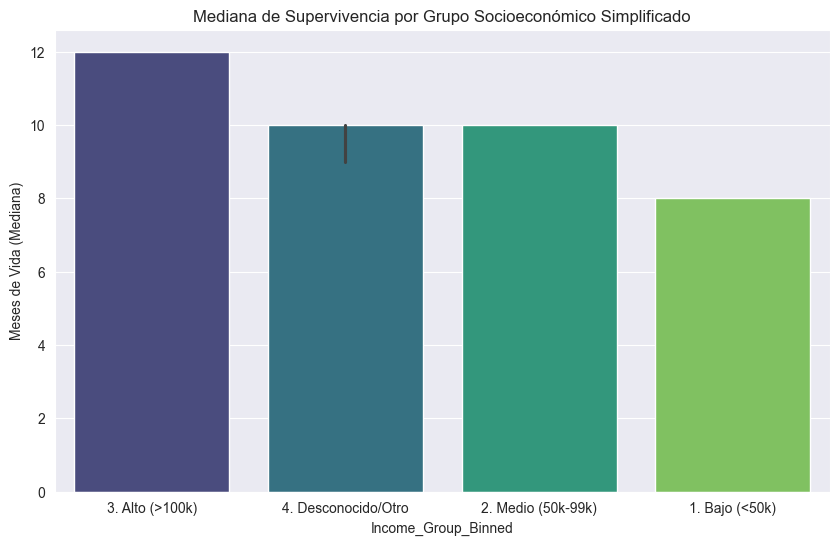

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_clean,
    x='Income_Group_Binned',
    y='Survival months',
    hue='Income_Group_Binned',
    estimator='median',
    palette='viridis',
    legend=False
)
plt.title('Mediana de Supervivencia por Grupo Socioeconómico Simplificado')
plt.ylabel('Meses de Vida (Mediana)')
plt.show()

### Curvas de Kaplan-Meier

C:\Users\elius\AppData\Local\Programs\Python\Python311\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\elius\AppData\Local\Programs\Python\Python311\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\elius\AppData\Local\Programs\Python\Python311\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.

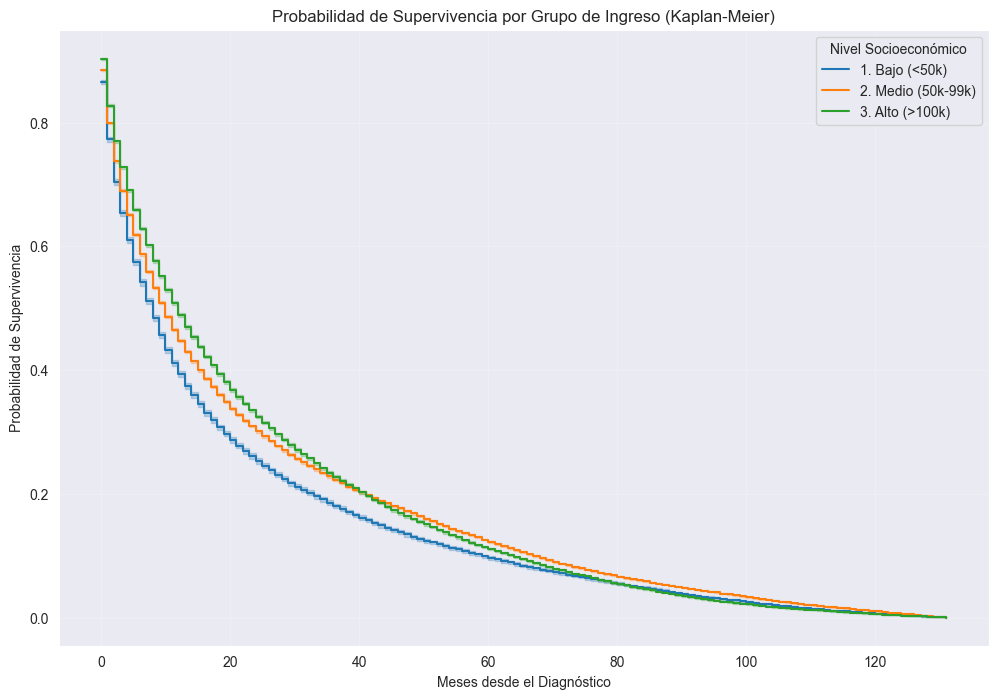

In [123]:
# Crear el objeto KM
kmf = KaplanMeierFitter()

plt.figure(figsize=(12, 8))

# Filtrar el grupo "Desconocido" para que la gráfica sea más clara
df_km = df_clean[df_clean['Income_Group_Binned'] != '4. Desconocido/Otro']

# Graficar una curva por cada grupo de ingreso
for grupo in sorted(df_km['Income_Group_Binned'].unique()):
    mask = (df_km['Income_Group_Binned'] == grupo)
    kmf.fit(df_km[mask]['Survival months'], label=grupo)
    kmf.plot_survival_function()

plt.title('Probabilidad de Supervivencia por Grupo de Ingreso (Kaplan-Meier)')
plt.xlabel('Meses desde el Diagnóstico')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend(title='Nivel Socioeconómico')
plt.grid(True, alpha=0.2)
plt.show()

### Observaciones

**Este es el punto más fuerte del análisis actual:**

1. La Brecha Social: El gráfico de barras original mostraba una "meseta" de supervivencia, pero la curva de Kaplan-Meier con los grupos agrupados (Binned) revela la verdad:

- Línea Azul (Bajo <50k): Es la que cae más rápido y siempre se mantiene por debajo de las demás. La probabilidad de supervivencia es sistemáticamente menor en cada mes del seguimiento.

- Línea Verde (Alto >100k): Muestra una mayor "resistencia" inicial. La separación entre la línea azul y la verde representa la "brecha de supervivencia" causada por factores socioeconómicos.

2. Convergencia Final: Notese que al llegar a los 100 meses, las tres líneas se juntan cerca del 0. Esto indica que, a muy largo plazo, la agresividad biológica del cáncer termina igualando las probabilidades, pero el ingreso económico compra tiempo de vida valioso en los primeros 2 a 5 años.

### Matriz de Asociación Categórica (V de Cramér)

In [124]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

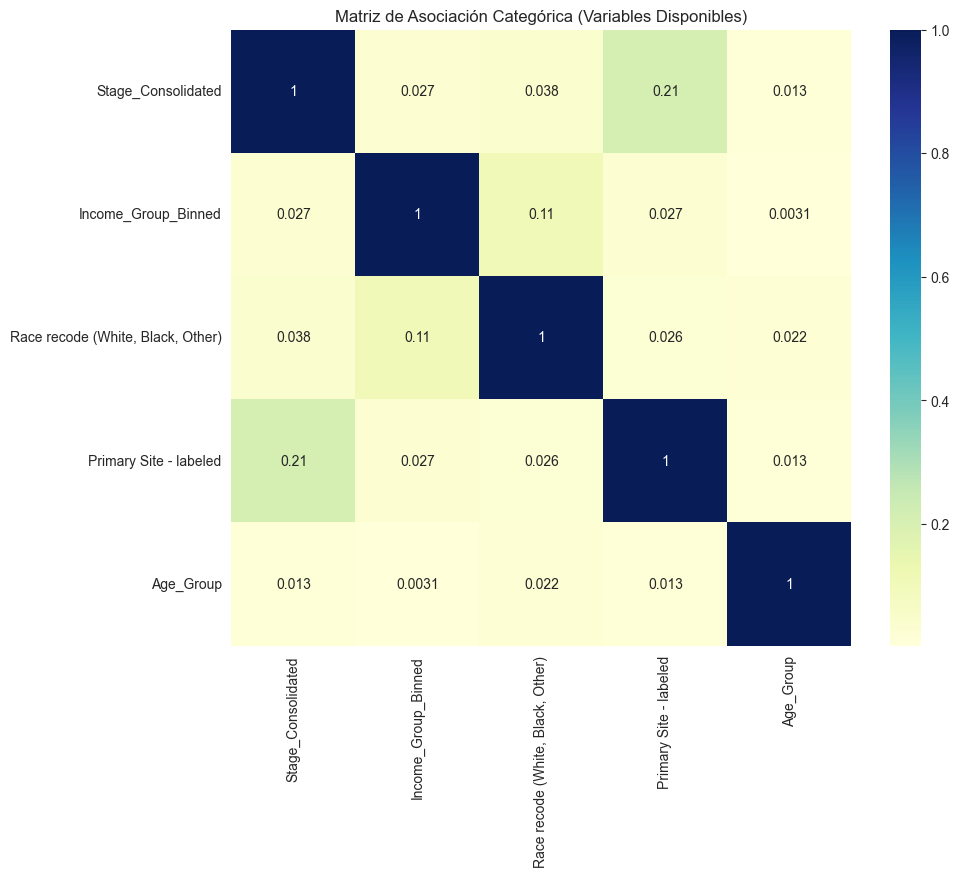

In [125]:
# Lista de columnas que SI existen en tu lista
cols_validas = [
    'Stage_Consolidated',
    'Income_Group_Binned',
    'Race recode (White, Black, Other)',
    'Primary Site - labeled',
    'Age_Group'
]

# Creamos la tabla de resultados
results = pd.DataFrame(index=cols_validas, columns=cols_validas)

for col1 in cols_validas:
    for col2 in cols_validas:
        results.loc[col1, col2] = cramers_v(df_clean[col1], df_clean[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(results.astype(float), annot=True, cmap='YlGnBu')
plt.title('Matriz de Asociación Categórica (Variables Disponibles)')
plt.show()

### observaciones:

La matriz muestra valores bajos en general (por debajo de 0.3), lo cual es una excelente noticia para nuestro futuro modelo. Baja Multicolinealidad: Significa que nuestras variables no están "diciendo lo mismo".

Cada una (Etapa, Ingresos, Sitio) aporta una pieza distinta del rompecabezas. Si tuvieramos valores de 0.8 o 0.9, tendríamos que eliminar variables por ser redundantes.

In [126]:
df_clean.columns = (
    df_clean.columns
    .str.strip()          # quita espacios
    .str.replace(r'\s+', ' ', regex=True)  # colapsa espacios múltiples
)

### Regresión de Cox (Hazard Ratios)

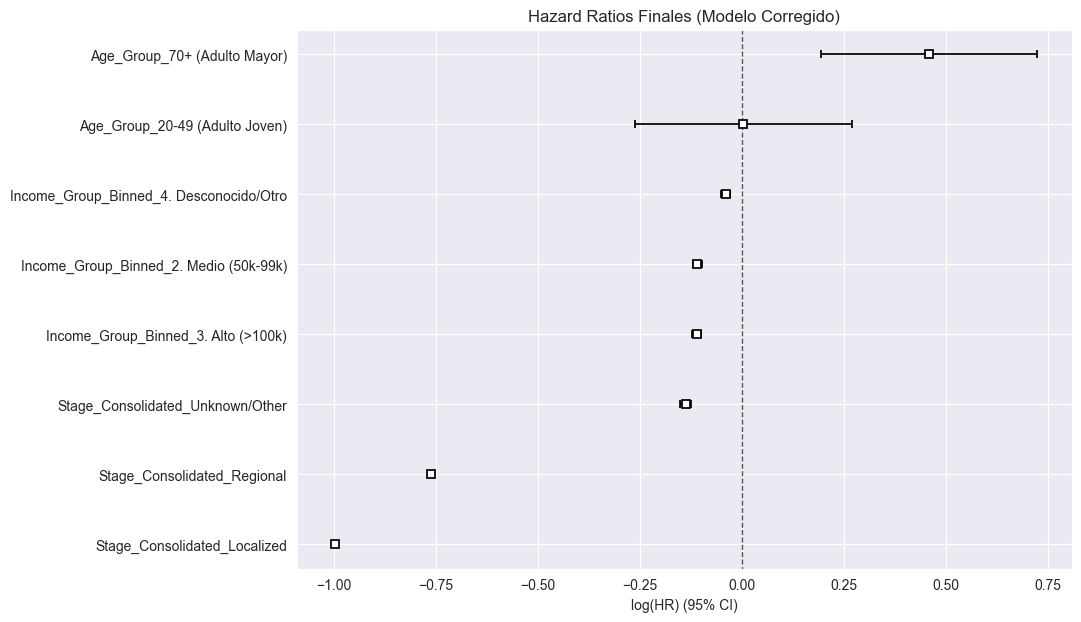

                                             coef  exp(coef)             p
covariate                                                                 
Stage_Consolidated_Localized            -0.997225   0.368902  0.000000e+00
Stage_Consolidated_Regional             -0.762811   0.466354  0.000000e+00
Stage_Consolidated_Unknown/Other        -0.137957   0.871136  4.340442e-86
Income_Group_Binned_2. Medio (50k-99k)  -0.109148   0.896598  3.633127e-87
Income_Group_Binned_3. Alto (>100k)     -0.110584   0.895311  1.419576e-80
Income_Group_Binned_4. Desconocido/Otro -0.040124   0.960670  1.936269e-13
Age_Group_20-49 (Adulto Joven)           0.003115   1.003120  9.816854e-01
Age_Group_70+ (Adulto Mayor)             0.457544   1.580188  6.917398e-04


In [127]:
# 1. Aseguramos que 'Survival months' sea numérica
df_clean['Survival months'] = pd.to_numeric(df_clean['Survival months'], errors='coerce')

# 2. Seleccionamos las columnas para este análisis específico
columnas_modelo = ['Survival months', 'Stage_Consolidated', 'Income_Group_Binned', 'Age_Group']
df_cox = df_clean[columnas_modelo].dropna()

# 3. Creamos los dummies de forma SEGURA
# (especificamos las columnas para que no toque 'Survival months')
df_dummies = pd.get_dummies(
    df_cox,
    columns=['Stage_Consolidated', 'Income_Group_Binned', 'Age_Group'],
    drop_first=True
)


if 'Survival months' in df_dummies.columns:

    # 4. Entrenar el modelo de Cox
    cph = CoxPHFitter()
    cph.fit(df_dummies, duration_col='Survival months')

    # 5. Visualización y Resumen
    plt.figure(figsize=(10, 7))
    cph.plot()
    plt.title('Hazard Ratios Finales (Modelo Corregido)')
    plt.show()

    print(cph.summary[['coef', 'exp(coef)', 'p']])


### Observaciones

1. **El Factor Clínico: La Etapa es el "Rey"**

La referencia del modelo es la etapa Distant (metástasis).
- Stage_Consolidated_Localized (HR = 0.36):
Esto significa que un paciente con cáncer localizado tiene un 64% menos de riesgo de morir en cualquier momento dado comparado con uno en etapa distante.
- Stage_Consolidated_Regional (HR = 0.46): El riesgo se reduce un 54% respecto a la etapa metastásica.
- Confirmación: Como el p-valor es 0.000000e+00, la etapa es el predictor más sólido y confiable de tu dataset.

2. **El Factor Social: La Ventaja Económica**

La referencia aquí es el grupo de Ingreso Bajo (<50k).Income_Group_Binned_Alto (HR = 0.89):
- Tener un ingreso alto reduce el riesgo de muerte en un 11% en comparación con los ingresos bajos, incluso si tienen la misma etapa de cáncer.
- Income_Group_Binned_Medio (HR = 0.89): Presenta una reducción casi idéntica (10-11%).
- Interpretación: Existe una brecha de supervivencia real por dinero. Aunque el efecto de la medicina (etapa) es más fuerte, el estatus socioeconómico actúa como un factor protector adicional significativo (p < 0.05).3.
3. **El Factor Biológico: La Edad**

La referencia es el grupo de 50-69 años.
- Age_Group_70+ (HR = 1.58): Ser un adulto mayor de 70 años aumenta el riesgo de muerte en un 58% respecto al grupo de mediana edad. Esto es esperable por la fragilidad biológica y posibles comorbilidades.
- Age_Group_20-49 (HR = 1.00): El p-valor es 0.98 (no significativo). Esto nos dice que, estadísticamente, no hay una diferencia real de riesgo entre un adulto joven y uno de mediana edad en este dataset una vez que controlamos por la etapa del cáncer.

### Conclusión

Aunque la etapa del cáncer es el factor más determinante, el nivel socioeconómico bajo y la edad avanzada de 70+ años son agravantes independientes que disminuyen las probabilidades de supervivencia.

### ¿El dinero ayuda más a los de etapa Localizada que a los de etapa Distante?

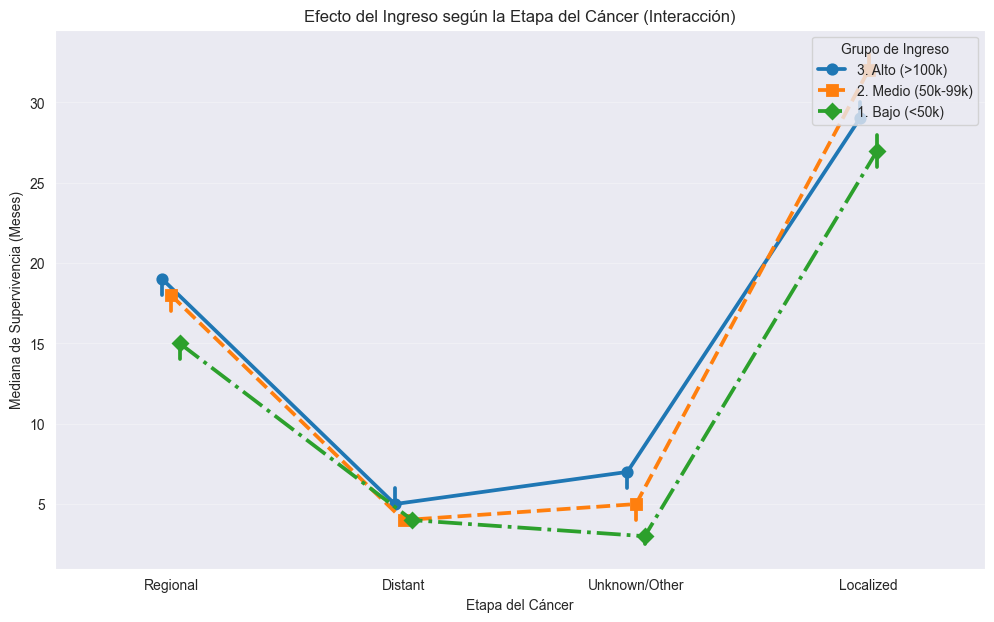

In [128]:
# Filtramos grupos con pocos datos para limpiar el gráfico
df_interaccion = df_clean[df_clean['Income_Group_Binned'] != '4. Desconocido/Otro']

plt.figure(figsize=(12, 7))
sns.pointplot(
    data=df_interaccion,
    x='Stage_Consolidated',
    y='Survival months',
    hue='Income_Group_Binned',
    estimator=np.median,
    dodge=True,
    markers=["o", "s", "D"],
    linestyles=["-", "--", "-."]
)

plt.title('Efecto del Ingreso según la Etapa del Cáncer (Interacción)')
plt.ylabel('Mediana de Supervivencia (Meses)')
plt.xlabel('Etapa del Cáncer')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Grupo de Ingreso', loc='upper right')
plt.show()

### Observaciones:

1. **El Impacto del Dinero según la Gravedad**

Al observar el gráfico de interacción, notamos un fenómeno fascinante:

- En Etapas Tempranas (Localized/Regional): Las líneas están notablemente separadas. En la etapa Localized, el grupo de ingresos altos supera los 30 meses de mediana, mientras que el grupo bajo se queda cerca de los 27 meses.

-  Etapa Crítica (Distant): ¡Las líneas casi se tocan! En el cáncer metastásico, la mediana de supervivencia cae drásticamente para todos (alrededor de 5 meses), y la ventaja económica prácticamente desaparece.

**Conclusión:** El nivel socioeconómico es un factor protector crítico en las etapas donde el cáncer aún es tratable, pero pierde su poder frente a la agresividad biológica de una etapa terminal.

2. **La Anomalía de "Unknown/Other"**

Es muy revelador que en la categoría de etapa desconocida, el grupo de Ingresos Altos tenga una supervivencia significativamente mayor que el resto. Esto podría indicar que los pacientes con recursos, incluso con diagnósticos poco claros inicialmente, logran acceder a pruebas diagnósticas más rápidas o costosas que clarifican su situación y permiten un tratamiento temprano.

## Ingeniería de características

In [129]:
# 1. Variable de Evento (Vital Status)
# Convertimos el texto a binario para que el modelo entienda la supervivencia
df_clean['Event'] = df_clean['Vital status recode (study cutoff used)'].apply(lambda x: 1 if 'Dead' in str(x) else 0)

# 2. Variable de Cirugía (RX Summ--Surg Prim Site)
# Simplificamos: 0 = No hubo cirugía, 1 = Sí hubo cirugía
# SEER usa '00' para indicar que no hubo cirugía en el sitio primario
df_clean['Has_Surgery'] = df_clean['RX Summ--Surg Prim Site (1998+)'].apply(
    lambda x: 0 if str(x) == '00' or 'No surgery' in str(x) else 1)

## Guardamos nuestro DataFrame listo para el Test/Train y posterior modelado

In [130]:
# Definimos qué columnas usará el modelo
columnas_finales = ['Survival months', 'Event', 'Has_Surgery', 'Income_Level']

# Creamos el DataFrame final aplicando Get Dummies a las categorías
df_ml_final = df_ml = pd.get_dummies(df_clean[columnas_finales + ['Stage_Consolidated', 'Age_Group']], drop_first=True)

# Guardamos esta versión en tu carpeta de processed para no perderla
df_ml_final.to_csv('../data/processed/dataset_final_modelado_v2.csv', index=False)